# 1. Vorlesung Nichtlineare Regelungstechnik 1

## Beispiel zum Thema Chaos (Teil 1)

Das folgende System wird für verschiedene Anfangswerte simuliert, um zu zeigen, dass bereits kleine Unterschiede in diesen zu qualitativ stark unterschiedlichem Verhalten führen können:

\begin{equation*}
\ddot x(t) + b \cdot \dot x(t) + x^7(t) = u(t) \quad \text{mit} \quad u(t) = \cos(0.1t) \cdot \sin(3t)
\end{equation*}

mit $b = 0.1$. Es handelt sich um einen Feder-Masche-Schwinger mit geringer Dämpfung und stark nichtlinearer Federkennlinie.

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2022-2023 Philipp Daferner und Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

# Simulation

## Import der nötigen Module

In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
from dataclasses import dataclass

## Festlegung der Simulationsparameter

Variieren Sie ruhig mal die maximal zulässige Schrittweite für den Gleichungslöser. Selbst das beeinflusst schon das Ergebnis!

In [2]:
@dataclass
class sim_para:
    t0 = 0          # start time
    tf = 20         # final time
    dt = 0.02       # step-size

## Definition der rechten Seite der Differenzialgleichung

Definition der rechten Seit der Dgl. Dazu wird die Dgl. zweiter Ordnung in zwei Dgls. 
erster Ordnung mittels der Transformation $x_1 := x$, $x_2 := \dot x$ überführt.

In [3]:
def ode(t, x):
    b = 0.1     

    x1, x2 = x
    u = control(t)

    # dxdt = f(x, u):
    dxdt = np.array([x2,
                     -x1**7-b*x2+u])

    return dxdt

Stellgesetz zu Berechnung von $u$

In [4]:
def control(t):
    return np.cos(.1*t)*np.sin(3*t)

## Vorbereitung der Simulation

Die Simulation wird von zwei Anfangszuständen aus gestartet, die sich nur um 0.01 unterscheiden.

In [5]:
# Anfangszustand
x0A = [-2, 3]
x0B = [-2.01, 3.01]
x0_vec = [x0A, x0B]

# Zeitvektor
tt = np.arange(sim_para.t0, sim_para.tf + sim_para.dt, sim_para.dt)

## Durchführung der Simulation

In [6]:
outputs = []

for x0 in x0_vec:
    sol = sci.solve_ivp(ode, [sim_para.t0, sim_para.tf], x0, t_eval=tt, max_step=sim_para.dt)
    outputs.append(sol.y)

# Verlauf Stellgröße (in beiden Fällen gleich)
u_traj = control(tt)

## Ergebnisse darstellen

<div class="alert alert-block alert-info">
    <b>Tip:</b> Entfernen Sie das Kommentarzeichen `#` vor `%matplotlib widget`, um interaktive Plots zu erhalten (ggf. Menüpunkt Kernel - Restart Kernel and Run All Cells erforderlich).
</div>

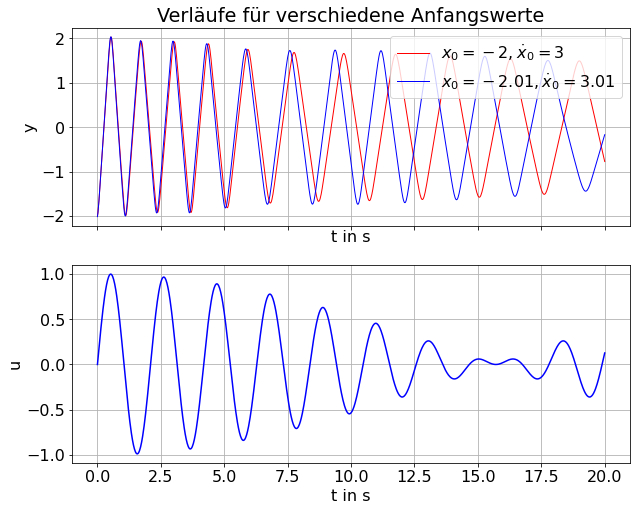

In [7]:
#%matplotlib widget

# Schriftgröße
plt.rcParams['font.size'] = '16'

# Abbildung mit mehreren Plots erstellen
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

# Größe festlegen
fig.set_size_inches(10,8)

# Ausgang
ax[0].plot(tt, outputs[0][0,:], label='$x_0={}, \dot x_0={}$'.format(x0_vec[0][0], x0_vec[0][1]), lw=1, color='r')
ax[0].plot(tt, outputs[1][0,:], label='$x_0={}, \dot x_0={}$'.format(x0_vec[1][0], x0_vec[1][1]), lw=1, color='b')
ax[0].grid(True)
ax[0].set_title('Verläufe für verschiedene Anfangswerte')
ax[0].set_ylabel(r'y')
ax[0].set_xlabel(r't in s')
ax[0].legend()

# Stellgröße
ax[1].plot(tt, u_traj, color='b')
ax[1].grid(True)
ax[1].set_ylabel(r'u')
ax[1].set_xlabel(r't in s')

plt.show()